## Project: Analyzing Weather Data
by David Witkowski

### Step 1a: Identify the information in the file your program will read
This file contains information about the weather in Vancouver in 2016 (at the weather station at the international airport).

Each row represents one day with its:
 - Date/Time
 - Year
 - Month
 - Day
 - Data Quality
 - Max Temp (°C)
 - Max Temp Flag
 - Min Temp (°C)
 - Min Temp Flag
 - Mean Temp (°C)
 - Mean Temp Flag
 - Heat Deg Days (°C)
 - Heat Deg Days Flag
 - Cool Deg Days (°C)
 - Cool Deg Days Flag
 - Total Rain (mm)
 - Total Rain Flag
 - Total Snow (cm)
 - Total Snow Flag
 - Total Precip (mm)
 - Total Precip Flag
 - Snow on Grnd (cm)
 - Snow on Grnd Flag
 - Dir of Max Gust (10s deg)
 - Dir of Max Gust Flag
 - Spd of Max Gust (km/h)
 - Spd of Max Gust Flag

 
### Step 1b: Write a description of what your program will produce
Ideas for what the program might produce:
 - a list of all the days with rainfall
 - a list of all the days with a maximum temperature of 0°C
 - a list of all the days with snowfall
 - the day with the highest amount of rainfall
 - the number of days with rainfall
 - a line chart showing the maximum temperature per day over the year
 - a bar chart showing the average rainfall per month
 
In this program, I will create a line chart showing the total rainfall (mm) per month. 

### Step 1c: Write or draw examples of what your program will produce

```python
main('daily_weather_2016.csv')
```

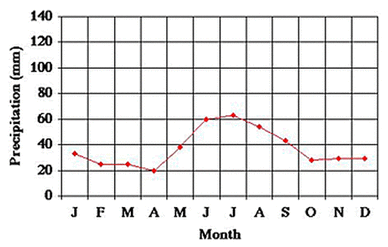

### Step 2a - Design data definitions

From the information available, all that I need to solve the problem is the rainfall (mm) and the month. I'll call the consumed type `Weather`.

In [1]:
from cs103 import *
from typing import List, NamedTuple
from matplotlib import pyplot
import csv

In [2]:
Weather = NamedTuple('Weather', [('month', int),       # in range (>0)
                                 ('rainfall', float)]) # in range (>0)
# interp. a day with its month and rainfall (mm)
W1 = Weather(1, 0.0)
W2 = Weather(11, 31.0)
W3 = Weather(12, 1.2)
W4 = Weather(12, 7.2)

# template based on compound
def fn_for_weather(w: Weather) -> ...:
    return ...(w.month,
               w.rainfall)

# List[Weather]
# interp. a list of weather data
LOW0 = []
LOW1 = [W1, W2]
LOW2 = [W1, W2, W3, W4]

# template based on arbitrary-sized and the reference rule
def fn_for_low(low: List[Weather]) -> ...:
    # description of the acc
    acc = ...   # type: ...
    for w in low:
        ...(acc, fn_for_weather(w))
        
    return ...(acc)

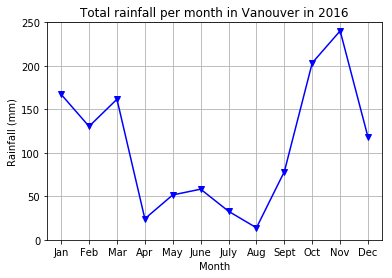

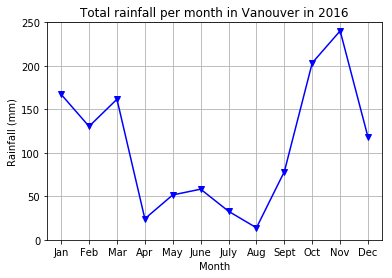

32 of 32 tests passed


In [3]:
@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename and creates a line chart showing the total rainfall (mm) per month
    """
    # template based on function composition 
    return plot_line_chart(read(filename, 26)) 


@typecheck
def read(filename: str, num_header_rows: int) -> List[Weather]:
    """
    Reads information from the specified file and returns a list of weather data (month and rainfall)

    Skips the first num_header_rows rows.
    """

    # low contains the result so far
    low = [] # type: List[Weather]

    with open(filename) as csvfile:
        reader = csv.reader(csvfile)

        # the current line in the input file
        line = 0   # type: int

        for row in reader:
            line = line + 1
            if line > num_header_rows:
                # if we reach this point, we are past the header rows
                month = parse_int(row[2])
                rainfall = parse_float(row[15])
                # only read lines without any missing values
                if is_valid_month(month) and is_valid_rainfall(rainfall):
                    w = Weather(month, rainfall)
                    low.append(w)

    return low


@typecheck
def is_valid_month(month: Optional[int]) -> bool:
    """
    return False if month is None and True otherwise
    """
    # return True # stub
    # template based on one-of (2 cases), atomic distinct and atomic non-distinct
    if month is None:
        return False
    else:
        return True


@typecheck
def is_valid_rainfall(rainfall: Optional[float]) -> bool:
    """
    return False if rainfall is None and True otherwise
    """
    # return True # stub
    # template based on one-of (2 cases), atomic distinct and atomic non-distinct
    if rainfall is None:
        return False
    else:
        return True
    

@typecheck
def plot_line_chart(low: List[Weather]) -> None:
    """
    Displays a line chart of the daily rainfall per month in low over time
    """
    # return None # body of the stub

    # set properties of your chart    
    pyplot.xlabel("Month")
    pyplot.ylabel("Rainfall (mm)")
    pyplot.title("Total rainfall per month in Vanouver in 2016")
    pyplot.axis([0.5, 12.5, 0, 250])
    plt.grid()
    
    # plot our data
    x_values = month_list(low)
    y_values = rainfall_list(low, x_values)
    line = pyplot.plot(x_values, y_values)
        
    # set the labels for each 'tick' on the x-axis
    tick_labels = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
    plt.xticks(x_values, tick_labels)
    
    # set properties of line
    pyplot.setp(line, color='b', marker='v')

    # show plot
    pyplot.show()

    
@typecheck
def month_list(low: List[Weather]) -> List[int]:
    """
    Creates a list of ints that represent the months in low
    
    Assumption: months are in order
    """
    # return [] # List[int]
    
    # template from List[Weather]
    # acc will hold the distinct months seen so far
    acc = [] # Type: List[int]
    # previous_element holds the information of the previous element
    previous_element = Weather(0, 0.0)
    
    for w in low:
        if not same_month(w, previous_element):
            acc.append(return_month(w))
            previous_element = w

    return acc 
    

@typecheck 
def same_month(w1: Weather, w2: Weather) -> bool:
    """
    Returns True if the months of w1 and w2 are the same, False otherwise
    """
    # return True # stub
    # template based on Weather
    return same_int(return_month(w1), return_month(w2))


@typecheck 
def same_int(m1: int, m2: int) -> bool:
    """
    Returns True if m1 equals m2, False otherwise
    """
    # return True # stub
    # template based on atomic non-distinct
    return m1 == m2


@typecheck 
def return_month(w: Weather) -> int:
    """
    returns the corresponding int for the month of w
    """
    # return 0 # stub
    # template based on Weather
    return w.month

 
@typecheck
def rainfall_list(low: List[Weather], month_list: List[int]) -> List[float]:
    """
    Creates a list of floats that represent the rainfall in each month of month_list
    """
    # return [] # List[int]
    
    # template from List[Weather]
    # acc will hold the total rainfall for each month
    acc = [] # Type: List[float]
    
    for m in month_list:
        acc.append(rainfall_per_month(low, m))
    
    return acc


@typecheck
def rainfall_per_month(low: List[Weather], month: int) -> float:
    """
    Returns the total rainfall for the given month
    """
    # return 0.0 # Stub
    
    # template from List[Weather]
    # acc will hold the total rainfall of the days seen so far
    acc = 0.0 # Type: float
    
    for w in low:
        if same_int(return_month(w), month):
            acc = acc + return_rainfall(w)
            
    return acc


@typecheck 
def return_rainfall(w: Weather) -> float:
    """
    returns the corresponding float for the rainfall of w
    """
    # return 0 # stub
    # template based on Weather
    return w.rainfall


# Begin testing
start_testing()

# Examples and tests for main
expect(main('daily_weather_2016.csv'), None)

# Examples and tests for read
expect(read('daily_weather_2016_test1.csv', 26), [Weather(1, 0.0), Weather(1, 0.0)])
expect(read('daily_weather_2016_test2.csv', 26), [Weather(7, 7.8), Weather(10, 1.2)])

# Examples and tests for is_valid_month
expect(is_valid_month(None), False)
expect(is_valid_month(1), True)
expect(is_valid_month(2), True)

# Examples and tests for is_valid_rainfall
expect(is_valid_rainfall(None), False)
expect(is_valid_rainfall(1.0), True)
expect(is_valid_rainfall(22.0), True)

# Examples and tests for plot_line_chart 
expect(plot_line_chart(read('daily_weather_2016.csv', 26)), None) 

# Examples and tests for month_list
expect(month_list([Weather(1, 0.0), Weather(1, 0.0)]), [1]) 
expect(month_list([Weather(7, 7.8), Weather(7, 7.8), Weather(10, 1.2)]), [7, 10]) 
expect(month_list([Weather(7, 7.8), Weather(7, 7.8), Weather(7, 1.2)]), [7]) 
expect(month_list(read('daily_weather_2016.csv', 26)), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) 

# Examples and tests for return_month
expect(return_month(Weather(1, 0.0)), 1) 
expect(return_month(Weather(2, 0.0)), 2) 

# Examples and tests for same_month
expect(same_month(Weather(1, 0.0), Weather(2, 0.0)), False) 
expect(same_month(Weather(2, 0.0), Weather(2, 0.0)), True) 

# Examples and tests for same_int
expect(same_int(1, 1), True) 
expect(same_int(2, 3), False)

# Examples and tests for rainfall_list
expect(rainfall_list(LOW1, [1]), [0.0]) 
expect(rainfall_list(LOW1, [1, 11]), [0.0, 31.0]) 
expect(rainfall_list(LOW1, [1, 11, 12]), [0.0, 31.0, 0.0]) 
expect(rainfall_list(LOW2, [1, 11, 12]), [0.0, 31.0, 8.4]) 
expect(rainfall_list(LOW2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31.0, 8.4])

# Examples and tests for rainfall_per_month
expect(rainfall_per_month(LOW1, 1), 0.0) 
expect(rainfall_per_month(LOW1, 2), 0.0) 
expect(rainfall_per_month(LOW1, 11), 31.0) 
expect(rainfall_per_month(LOW1, 12), 0.0) 
expect(rainfall_per_month(LOW2, 12), 8.4)

# Examples and tests for return_rainfall
expect(return_rainfall(Weather(1, 0.0)), 0.0) 
expect(return_rainfall(Weather(2, 2.0)), 2.0) 

# show testing summary
summary()